# Boston Housing Dataset

This dataset comprises real estate data from various suburbs in Boston, Massachusetts.

## Feature Definitions

| Feature | Description |
| :--- | :--- |
| **CRIM** | Per capita crime rate per town. |
| **ZN** | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **NOX** | Nitric oxide concentration (parts per 10 million). |
| **LSTAT** | **% lower status** of the population. |
| **...** | *(Check UCI ML Repository or kaggle for other features description)* |

## Workflow

The following steps outline the machine learning pipeline for this project:

1.  **Data Loading**: Load the Boston house price dataset.
2.  **Data Preprocessing**: Handle missing values, encode categorical variables (if any), and clean the data.
3.  **Exploratory Data Analysis (EDA)**: Analyze distributions and find correlations between features and the target variable.
4.  **Train-Test Split**: Split the data into training and testing sets to evaluate model performance.
5.  **Model Training**: Train an XGBoost Regressor (a scalable and high-performance algorithm based on decision trees).
6.  **Model Evaluation**: Assess the model's performance on the test set using appropriate regression metrics.

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Boston House Price Dataset

In [2]:
data_path = "/kaggle/input/boston-house-prices/housing.csv"
df = pd.read_csv(data_path, sep="\s+", header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'price']) # sep="\s+" : white space

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
# Checking for missing values
df.isnull().sum() # How many missing values are there for each column
# If there were some, we would use methods like dropping or imputation

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [6]:
# Statistical Measures
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Understanding the correlation between features in the Dataset

1.  **Positive Correlation**.
2.  **Negative Correlation**.

In [7]:
correlation = df.corr()

In [8]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


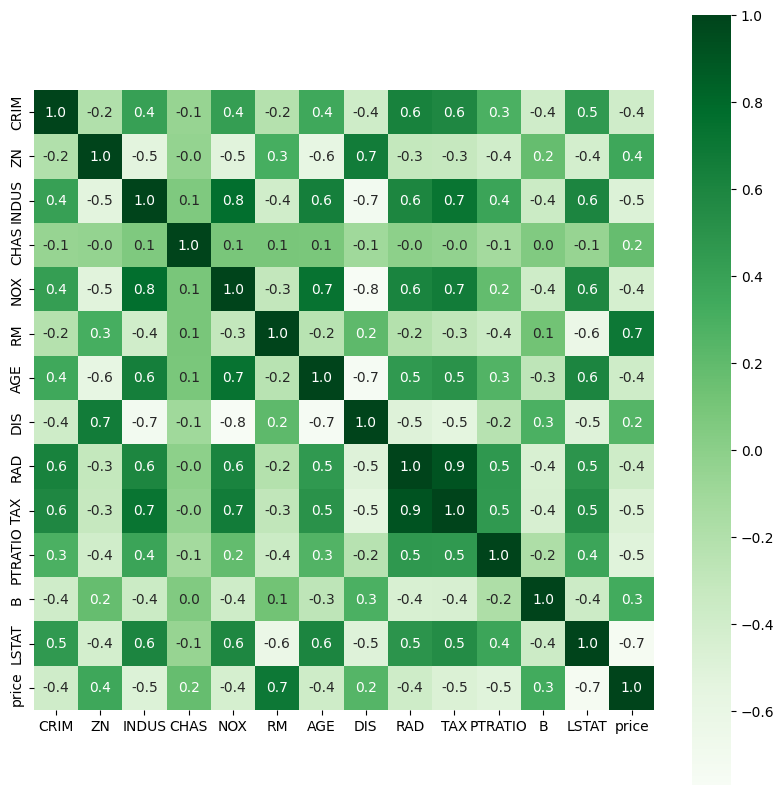

In [9]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens');
# fmt='.1f' : means one value is desired after the decimal point

## Splitting Features and Target

In [10]:
X = df.drop(columns="price", axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [11]:
y = df["price"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

## Splitting Data into Training and Testing Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [13]:
print("Dataset shapes after train-test split:")
print(f"X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y: {y.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Dataset shapes after train-test split:
X: (506, 13), X_train: (404, 13), X_test: (102, 13)
y: (506,), y_train: (404,), y_test: (102,)


## Model Training

In [14]:
# XGBoost is an ensemble model that uses two or more models together

# Loading the model 
model = XGBRegressor()

In [15]:
# Training
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

Since accuracy is for classification, we use different metrics for regression:

*   **Mean Absolute Error (MAE):** The average of the absolute differences between predicted and actual values. It gives a linear penalty for errors.
*   **Mean Squared Error (MSE):** The average of the squared differences between predicted and actual values. It heavily penalizes larger errors.
*   **R-squared (R²):** Measures the proportion of variance in the target variable that is predictable from the features.

In [16]:
# Prediction on training data
training_preds = model.predict(X_train)

In [17]:
training_preds

array([14.890703 , 19.642195 , 35.400345 , 12.016242 , 20.381865 ,
       23.702316 , 21.004805 , 50.00535  , 27.489727 , 12.681885 ,
       17.404818 , 23.786222 , 22.894043 , 18.505577 , 30.301188 ,
       31.19518  , 16.000065 , 23.340284 , 14.999737 , 10.195938 ,
       12.533196 , 19.588732 , 19.676384 , 19.53493  , 14.997095 ,
       35.398685 , 13.5039215, 20.58683  , 24.708351 , 21.901182 ,
       17.090359 , 23.616112 , 21.102757 , 15.59351  , 18.517344 ,
        8.301923 , 14.518146 , 23.914145 , 11.824473 , 24.599672 ,
       24.801905 , 18.732233 , 17.899395 , 48.80669  , 13.015619 ,
       29.601875 , 18.004438 , 20.101824 , 17.298218 , 23.106688 ,
       22.618582 , 13.792718 , 43.835552 , 35.205963 , 22.610245 ,
       17.42741  , 48.506363 , 31.497694 , 15.606423 , 14.210823 ,
       20.595139 , 22.02745  , 20.101086 , 17.591436 , 23.700542 ,
       14.104831 , 19.799774 , 24.398348 , 33.40823  , 39.79762  ,
       34.915394 , 24.779575 , 14.592391 , 23.363775 , 33.8286

In [24]:
# RSE
score_1 = metrics.r2_score(y_train, training_preds)
print("R Squared Error : ", score_1) 
# Should be close to 1 and if closer to zero the model is performing perfectly

R Squared Error :  0.9999968327963358


In [26]:
# MAE
score_2 = metrics.mean_absolute_error(y_train, training_preds)
print("Mean Absolute Error : ", score_2) # Pretty good RSA

Mean Absolute Error :  0.011230918676546346


In [28]:
# Prediction on testing data
testing_preds = model.predict(X_test)

In [30]:
# RSE
score_1_ = metrics.r2_score(y_test, testing_preds)
print("R Squared Error : ", score_1_)

R Squared Error :  0.9022178792512646


In [31]:
# MAE
score_2_ = metrics.mean_absolute_error(y_test, testing_preds)
print("Mean Absolute Error : ", score_2_)

Mean Absolute Error :  2.127565305373248


## Plotting the error (by visualizing actual and predicted prices)

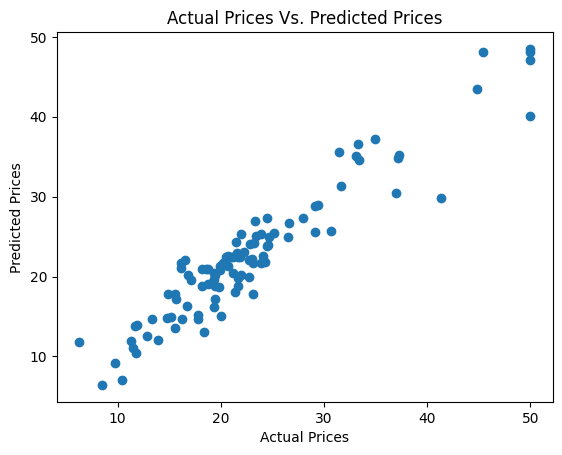

In [37]:
plt.scatter(y_test, testing_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs. Predicted Prices");